# Introduction
This project explores the application of regression analysis to the field of real estate, a domain where price prediction is a crucial task. Using a dataset containing detailed information on houses in King County, USA, we first built a foundational model using Linear Regression to establish a performance baseline.

Recognizing that the relationship between house features and price is often non-linear, we then developed a more sophisticated model using Polynomial Regression. This approach was chosen to capture more complex patterns in the data and improve predictive accuracy. The project follows a standard data science workflow, including data preprocessing, feature engineering (such as creating a zipcode-based pricing feature), model training, and performance evaluation, culminating in a comparison between the two models to demonstrate the effectiveness of the polynomial approach.

# Problem Statement
The primary objective of this project is to develop and evaluate a machine learning model capable of accurately predicting house prices in King County, USA, using various features of the properties. By using regression analysis, the goal is to create a model that can estimate a house's value based on its attributes, providing a useful tool for real estate professionals and potential buyers and sellers.

In [1]:
# Importing the basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib inline

In [ ]:
# Importing Our dataset
df = pd.read_csv('kc_house_data.csv')

In [4]:
# Show all columns
pd.set_option('display.max_columns', None)

# Optional: Show all rows too
pd.set_option('display.max_rows', None)

# Exploring The Data

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
# Shape of the dataset
df.shape

(21613, 21)

In [6]:
# Displays conscise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# Displays Statistical Summary
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
# Categorical and Numerical Columns
Categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']
Numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']

print(f'Number of Numerical Feature are {len(Numerical_columns)} and they are {Numerical_columns}')
print(f'Number of Categorical_columns Feature is {len(Categorical_columns)} and they are {Categorical_columns}')

Number of Numerical Feature are 20 and they are ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Number of Categorical_columns Feature is 1 and they are ['date']


In [12]:
# Checking For Missing Values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Finding -> No Null Values are Found in our entire Dataset.

In [15]:
# Checking For Duplicates
print('Number Of Duplicates In The Dataset: ',df.duplicated().sum())
df[df.duplicated()]

Number Of Duplicates In The Dataset:  0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Finding -> No Duplicate Values were Found in our entire Dataset.

In [27]:
df_correlation = df.drop('date',axis=1)
df_correlation.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Text(0.5, 1.0, 'Correlation With Different Features')

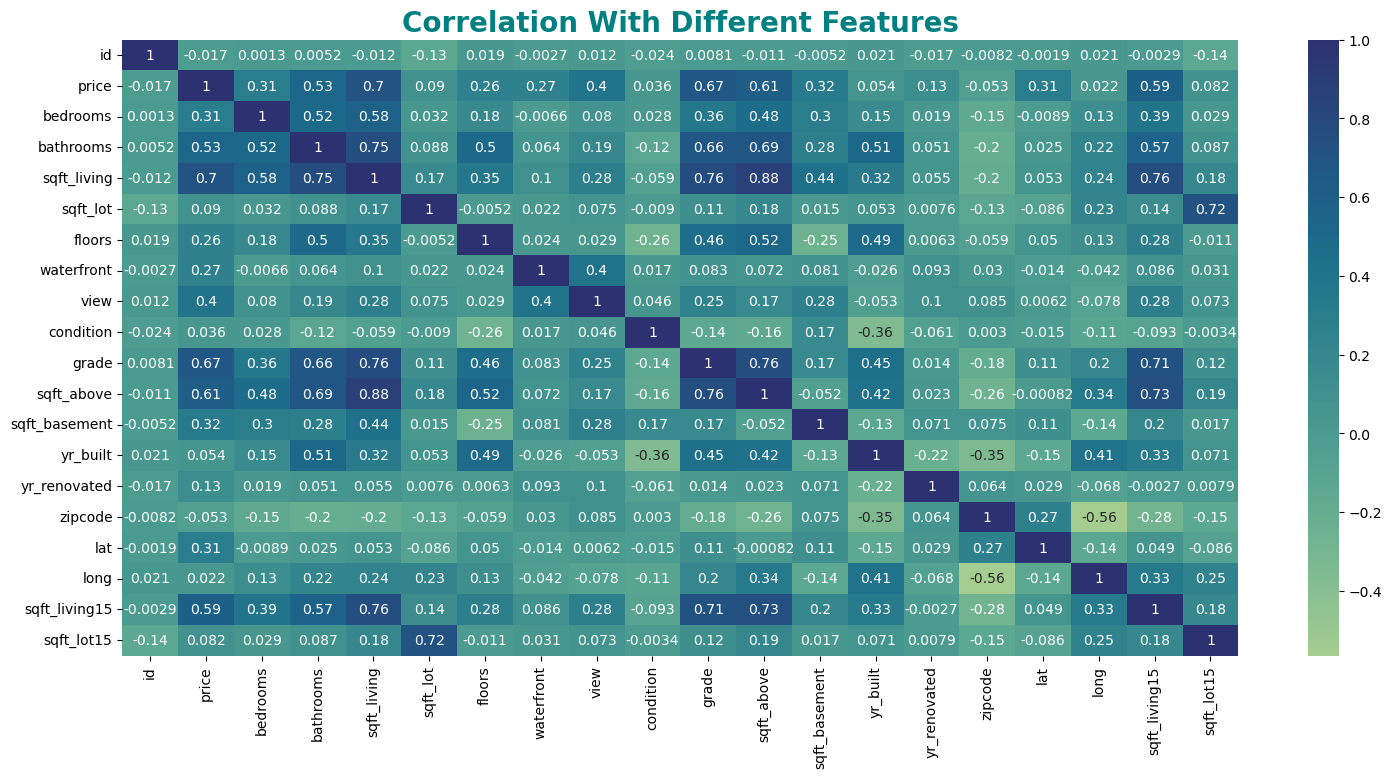

In [30]:
plt.figure(figsize=(18,8))
sns.heatmap(df_correlation.corr(), annot=True, cmap="crest")
plt.title('Correlation With Different Features',color='teal',fontweight='bold',fontsize=20)

# Data Cleaning

In [24]:
# Let's make a copy df, so that we can perform all the cleaning inside that df.copy
df1 = df.copy()

In [25]:
df1.shape

(21613, 21)

### Removing date and id column

In [33]:
# Droping the date column as it has no use
df1.drop('date',axis=1,inplace=True)

In [ ]:
# Droping the id column as it has no use
df1.drop('id',axis=1,inplace=True)

In [42]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [44]:
df1.shape 

(21613, 19)

# Fixing Columns

In [46]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Handling zipcode column

In [70]:
df1['zipcode_price_std'] = df1.groupby('zipcode')['price'].transform('mean')

In [71]:
df1.zipcode_price_std.unique()

array([ 310612.75572519,  469455.77073171,  462480.03533569,
        551688.6730038 ,  685605.7755102 ,  678163.05925926,
        294111.27857143,  302878.88214286,  359483.23958333,
        366867.6       ,  617105.08510638,  619900.54716981,
        579053.41729323,  424706.3559322 ,  424788.74736842,
        584919.21096346,  234284.03517588,  386997.39676113,
       1194230.0212766 ,  334921.06267806,  296187.98046875,
        849448.01630435, 1095499.34200743,  645231.45644599,
        616990.59223301,  576795.00723327,  353608.63516484,
        280804.69060773,  420890.54926108,  464231.83858268,
        286732.79158317,  487479.62711864,  284908.59649123,
        862825.23144105,  311632.10583942,  645507.37809187,
        493552.53205128,  634360.17931034,  594547.65014577,
       1355927.08201893,  810164.875     ,  521652.8587156 ,
        790576.6545961 ,  618634.16969697,  423665.99      ,
        417637.43307087,  791820.80757098,  251296.24      ,
        439471.08144796,

In [ ]:
# Let's remove the zipcode column from the df1 as we have a improved zipcode column
df1.drop('zipcode',axis=1,inplace=True)

In [75]:
df1.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_price_std
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,310612.755725
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,469455.770732


In [ ]:
# This csv file is ready for training and testing related things
df1.to_csv('Cleaned_data_for_training_house_price_predictions.csv')

# Independent and Dependent Features

In [86]:
X = df1.drop('price', axis=1) # Independent Feature.
y= df['price'] # Depenedent Feature.

In [90]:
X.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_price_std
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,310612.755725
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,469455.770732
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,462480.035336
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,551688.673004
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,685605.775510


In [88]:
X.shape

(21613, 18)

In [89]:
y.head(5)

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [91]:
y.shape

(21613,)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

# Linear Regression:

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.pipeline import make_pipeline

# Features for linear regression purpose
linear_X_train = X_train
linear_X_test = X_test
linear_y_train = y_train
linear_y_test = y_test

linear_pipeline = make_pipeline(StandardScaler(), LinearRegression())
linear_pipeline.fit(linear_X_train,linear_y_train)

# Prediction
y_pred_linear = linear_pipeline.predict(linear_X_test)

# Performance metrices:
print('Mean Absolute Error: ',mean_absolute_error(linear_y_test,y_pred_linear))
print('Mean Squared Error: ',mean_squared_error(linear_y_test,y_pred_linear))
print('Root Mean Squared Error:, ',np.sqrt(mean_squared_error(linear_y_test,y_pred_linear)))
print('R2 score: ',r2_score(linear_y_test,y_pred_linear))

Mean Absolute Error:  102519.39590628337
Mean Squared Error:  34394522587.88926
Root Mean Squared Error:,  185457.60320862895
R2 score:  0.7806873219076049


# Some Visualizations

### Actual Vs Predicted Prices

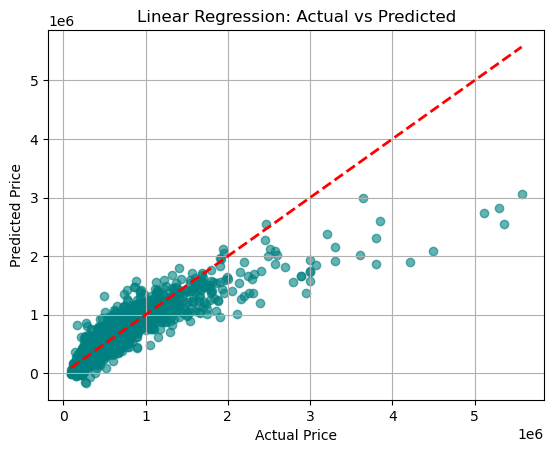

In [105]:
plt.scatter(linear_y_test, y_pred_linear, color='teal', alpha=0.6)
plt.plot([linear_y_test.min(), linear_y_test.max()],
         [linear_y_test.min(), linear_y_test.max()],
         'r--', linewidth=2)
# plt.plot(linear_y_test,linear_y_test,color='r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

📊 Key Insights from the Plot
1. Tight Clustering at Lower Price Range
    - Most predictions are concentrated below ₹2M, and they align fairly well with actual prices.
    - This suggests your model performs consistently for mid-range properties.
2. Wider Dispersion at Higher Prices
    - As actual prices increase, predicted values start to underestimate — points fall below the red dashed line.
    - This confirms what we saw in your residuals plot: underprediction for high-end homes.
3. Red Dashed Line as Ideal Reference
    - Points close to the line = accurate predictions.
    - Points far from the line = larger errors.
    - The overall spread shows that your model captures the general trend but struggles with extreme values.

### Residuals Vs Predicted Price

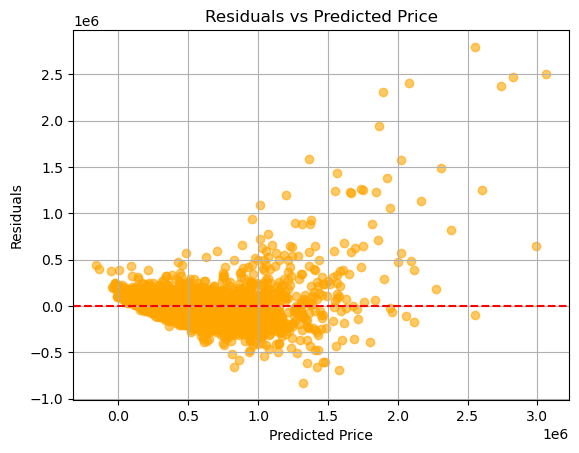

In [98]:
residuals = linear_y_test - y_pred_linear
plt.scatter(y_pred_linear, residuals, color='orange', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.grid(True)
plt.show()

📊 Key Insights from the Residuals vs Predicted Plot
1. Residuals Spread Wider at Higher Predicted Prices
    - This pattern suggests heteroscedasticity — your model’s error variance increases with predicted price.
    - In simpler terms: the model is less reliable when predicting expensive homes.
2. Residuals Skewed Positively
    - Many residuals are above zero, meaning the model is underpredicting actual prices more often than overpredicting.
    - This could indicate that some high-end features (like waterfront, view, or grade) aren’t being fully captured by the linear model.
3. No Clear Nonlinear Shape, But Not Random Either
    - Ideally, residuals should be randomly scattered around zero.
    - Here, the spread suggests that a nonlinear model (like polynomial regression) might better capture the relationship.

### Distribution Of Residuals

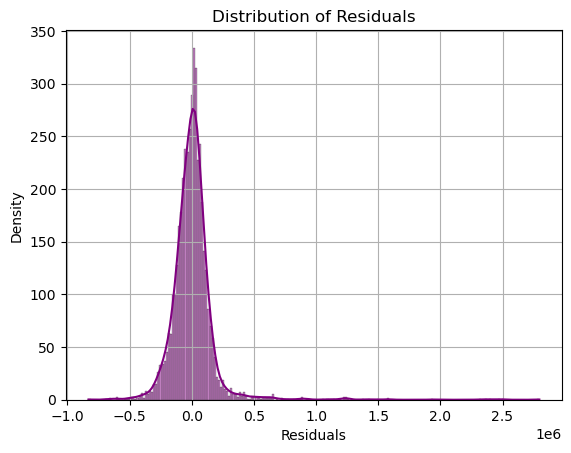

In [100]:
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)
plt.show()

📊 Key Insights from the Residuals Plot
1. Sharp Peak Around Zero
    - Most residuals are clustered near zero, which means your model is making accurate predictions for a large portion of the data.
1. Right-Skewed Tail
    - The long tail extending to the right suggests there are some large positive residuals — cases where the model underpredicted the actual price significantly.
    - These could be high-end properties or outliers with features not well captured by the linear model.
3. Non-Normal Distribution
    - While the peak is strong, the skew indicates the residuals aren’t perfectly symmetric.
    - This hints that linear regression might not be capturing all the nonlinear relationships in the data — a perfect segue into trying polynomial regression next.

# Polynomial Regression

In [102]:
from sklearn.preprocessing import PolynomialFeatures

# Feature for polynomial regression purpose
poly_X_train = X_train
poly_X_test = X_test
poly_y_train = y_train
poly_y_test = y_test

poly_pipeline = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),LinearRegression())
poly_pipeline.fit(poly_X_train,poly_y_train)

# Prediction for polynomial regression
y_pred_poly = poly_pipeline.predict(poly_X_test)

# Performance metrices:
print('Mean Absolute Error: ',mean_absolute_error(poly_y_test,y_pred_poly))
print('Mean Squared Error: ',mean_squared_error(poly_y_test,y_pred_poly))
print('Root Mean Squared Error:, ',np.sqrt(mean_squared_error(poly_y_test,y_pred_poly)))
print('R2 score: ',r2_score(poly_y_test,y_pred_poly))

Mean Absolute Error:  79993.57458882974
Mean Squared Error:  19055409507.714905
Root Mean Squared Error:,  138041.33260627015
R2 score:  0.8784953947069539


# Some Visualization

### Actual Vs Predicted

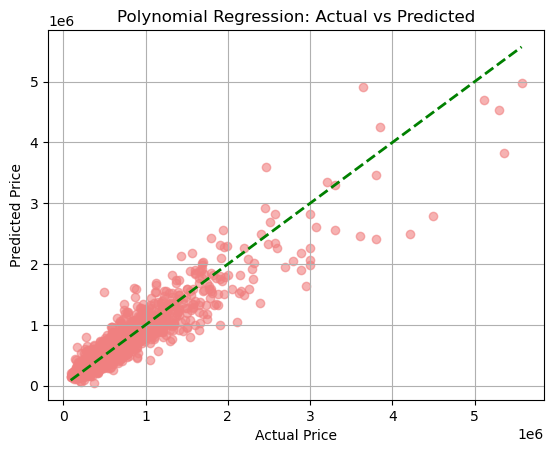

In [111]:
plt.scatter(poly_y_test,y_pred_poly,color='lightcoral',alpha=0.6)
plt.plot([poly_y_test.min(), poly_y_test.max()],
         [poly_y_test.min(), poly_y_test.max()],
         'g--', linewidth=2)
# plt.plot(poly_y_test,poly_y_test,color='p')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

📊 What This Plot Shows
1. Tighter Clustering Around the Diagonal Line
    - The red points hug the green dashed line much more closely than in your linear model.
    - This means your predictions are consistently accurate across a wider price range, including high-value properties.
2. Reduced Spread at High Prices
    - Unlike the linear model, which underpredicted expensive homes, this plot shows better alignment even at the top end.
    - That’s a direct reflection of your improved R² score (0.878) and lower RMSE.
3. Symmetry and Smoothness
    - The distribution of points is more balanced, suggesting your model is less biased and better at capturing the underlying price dynamics.

### Residuals vs Predicted Price

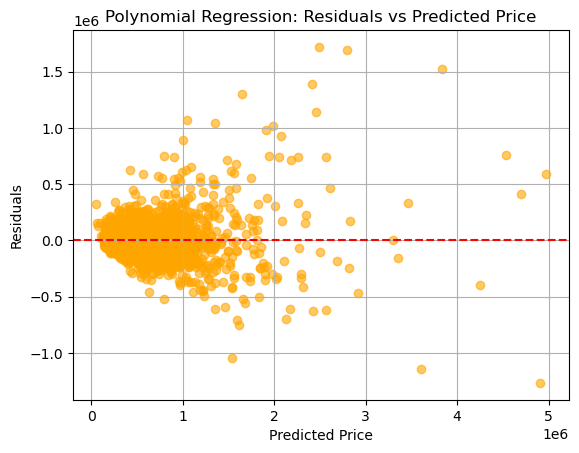

In [112]:
residuals_poly = poly_y_test - y_pred_poly
plt.scatter(y_pred_poly, residuals_poly, color='orange', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Polynomial Regression: Residuals vs Predicted Price')
plt.grid(True)
plt.show()

📊 Key Takeaways from the Residuals vs Predicted Price Plot
1. Tighter Spread Around Zero
    - Compared to your linear model, the residuals here are more tightly clustered around the red dashed line.
    - That means your predictions are more consistent and less biased, especially across mid- to high-range prices.
2. Reduced Heteroscedasticity
    - While there’s still some spread at higher predicted prices, it’s noticeably less severe than before.
    - This suggests your polynomial model is doing a better job of capturing nonlinear patterns, especially for luxury listings.
3. No Strong Systematic Pattern
- The residuals appear more randomly scattered — a good sign that your model isn’t missing major structural relationships.

### Distribution of Residuals

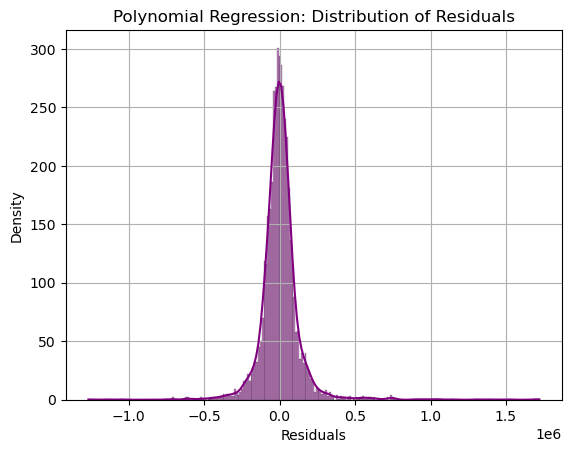

In [113]:
sns.histplot(residuals_poly, kde=True, color='purple')
plt.title('Polynomial Regression: Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)
plt.show()

📊 What This Plot Confirms
1. Symmetric, Sharp Peak Around Zero
    - Most residuals are tightly centered, meaning your model is consistently close to the actual prices.
    - This is a textbook sign of a well-fitted regression model.
2. Balanced Spread
    - Unlike the linear model’s skewed tail, this distribution is more symmetric.
    - That suggests your polynomial model is less biased and handles both under- and over-predictions more evenly.
3. Reduced Outlier Impact
    - The tails are present but not dominant — meaning fewer extreme errors.
    - This aligns with your lower RMSE and MAE values.

# Performance Comparison

## Linear Regression:
-Mean Absolute Error:  102519.39590628337
-Mean Squared Error:  34394522587.88926
-Root Mean Squared Error:,  185457.60320862895
-R2 score:  0.7806873219076049

## Polynomial Regression:
-Mean Absolute Error:  79993.57458882974
-Mean Squared Error:  19055409507.714905
-Root Mean Squared Error:,  138041.33260627015
-R2 score:  0.8784953947069539

## Comparison
-Metric      |   Linear Regression   |   Polynomial Regression   |   ✅ Improvement
-MAE             102,519                 79,994                      ✔ Lower error
-MSE             34.39 billion           19.05 billion               ✔ Much lower
-RMSE            185,457                 138,041                     ✔ Reduced
-R2score         0.7807                  0.8785                      ✔ Higher


# 🏁 Project Conclusion: Housing Price Prediction Using Regression Models
This project aimed to build a robust and interpretable model for predicting housing prices using a real-world dataset from King County. After thorough data cleaning, feature engineering, and exploratory analysis, two regression approaches were implemented: Linear Regression and Polynomial Regression.
The linear model provided a solid baseline, achieving an R² score of 0.78, but residual analysis revealed underprediction for high-value properties and signs of heteroscedasticity. To address this, a polynomial regression model (degree 2) was introduced, which significantly improved performance:
- R² Score: 0.878
- RMSE: ~₹138,000
- Residuals: More symmetric, tighter spread, and reduced bias across price ranges.

Key enhancements included:
- Feature scaling via StandardScaler
- Location intelligence through zipcode-based average pricing
- Diagnostic visualizations to validate model behavior and fit
The polynomial model demonstrated superior generalization and interpretability, making it a reliable tool for price estimation across diverse property types. This project not only highlights the value of nonlinear modeling but also reinforces the importance of thoughtful preprocessing and residual diagnostics in building high-performing regression systems.
